# Сбор информации
Реализовать с помощью объектно-ориентированного подхода предыдущие 2 задания. Создайте для каждой из задач отдельный класс, который позволяет ее решить.

* Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф" | Если не получается скачать данные, реализуйте загрузку данных из pickle-файла

* Cохранить ее в pandas dataframe, а также в excel, pickle, БД

* Проверить состояние датафрейма и привести его в формат, позволяющий дальнейшее исследование данных

* Сделать визуализацию для мини-исследования рынка строящейся недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.

In [23]:
import requests 
import pandas as pd

class DomIdLoader:
    def __init__(self, pickle_name):
        try:
            # реализовал чтение из готового пикла, 
            # т.к. с загрузкой с сайта какие-то проблемы
            self.df = pd.read_pickle(pickle_name)
        except Exception as e:
            self.df = None
            print(e)

    def get_ids(self):
        if self.df is not None:
            return self.df 
        else: 
            raise NoDataException
            
    def show_ids(self):
        if self.df is not None:
            print (f' length: {self.df. shape [0]}')
            return self.df. sample(min(10, self.df.shape [0]) )
        else:
            print ( 'no data')

In [24]:
ids = DomIdLoader('домрф')

In [26]:
ids.show_ids()

 length: 11649


,hobjId,objId,rpdRegionCd,objAddr,objFloorMin,objFloorMax,objElemLivingCnt,objReady100PercDt,objSquareLiving,objCompensFundFlg,...,developer.orgForm.fullForm,developer.orgForm.shortForm,developer.companyGroup,developer.devInn,objCommercNm,complexShortName,developer.bankruptStage.bankruptStageCd,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm
234,119802,39385,50,"д Калачево, тер КМЖЗ Александрия, д. 49",2,2,4,2024-09-30,374.14,0,...,Общество с ограниченной ответственностью,ООО,NaN,5009088111,"Жилой комплекс ""Александрия Таун""",NaN,NaN,NaN,NaN,NaN
485,119972,39550,23,"г Сочи, район Хостинский р-н",20,20,272,2025-12-31,7481.30,0,...,Общество с ограниченной ответственностью,ООО,6695.0,2367015397,ЖК Кислород,NaN,NaN,NaN,NaN,NaN
440,130694,50046,72,"г Тюмень, ул Василия Подшибякина, д. 9",8,11,149,2024-03-31,8433.70,0,...,Общество с ограниченной ответственностью,ООО,9219.0,7203430428,Уездные кварталы,NaN,NaN,NaN,NaN,NaN
297,136434,55721,78,"город Санкт-Петербург, Ленинский проспект, уча...",2,21,646,2026-12-31,22440.00,0,...,Общество с ограниченной ответственностью,ООО,NaN,7810336996,Южный Форт,NaN,NaN,NaN,NaN,NaN
482,136679,55965,54,город Бердск,2,2,1,2025-03-31,68.43,0,...,Общество с ограниченной ответственностью,ООО,NaN,5445256951,NaN,"ЖК""Морион""",NaN,NaN,NaN,NaN
326,131916,51261,74,"г Челябинск, район Калининский, д. Стр. № 16, ...",16,17,275,2024-06-30,13420.89,0,...,Общество с ограниченной ответственностью,ООО,7578.0,7448189746,"Жилой комплекс ""МАКЕЕВ"" (ЖК ""МАКЕЕВ"")",NaN,NaN,NaN,NaN,NaN
465,136703,55989,54,город Бердск,3,3,1,2025-03-31,109.02,0,...,Общество с ограниченной ответственностью,ООО,NaN,5445256951,NaN,NaN,NaN,NaN,NaN,NaN
175,132786,52140,25,"г Уссурийск, ул Трудовая, д. 4",8,8,88,2024-03-31,3900.80,0,...,Общество с ограниченной ответственностью,ООО,NaN,2511121023,NaN,NaN,NaN,NaN,NaN,NaN
482,131720,51066,60,"д Портянниково, ул Окольная, д. 5",9,9,64,2025-09-30,3313.10,0,...,Общество с ограниченной ответственностью,ООО,NaN,6037005574,NaN,NaN,NaN,NaN,NaN,NaN
328,134638,53968,65,"город Южно-Сахалинск, улица 140-летия города Ю...",5,5,15,2025-12-31,1008.67,0,...,Общество с ограниченной ответственностью,ООО,NaN,6500011435,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
import numpy as np
from matplotlib import pyplot as plt
class ObjectInfoExtractor:
    def __init__(self, ids):
        self.ids = ids
        self.load_data()
        self.df_converter()
        
    def parseCity(self, objAddr) -> str:
    # смотрим на адрес, пытаемся вытащить город
        for city in ['Москва', 'Краснодар', 'Санкт-Петербург','Екатеринбург', 'Владивосток',
                     'Тюмень', 'Новосибирск', 'Казань', 'Ростов-на-Дону', 'Волгоград','Уфа',
                     'Сочи','Красноярск','Ижевск' ]:
            if city in objAddr:
                return city
        return 'Остальные'

    def load_data(self):
        self.df = self.ids.get_ids()
    
    def df_converter(self):
        self.df['city'] = self.df['objAddr'].apply(lambda x: self.parseCity(x))
        for float_column in ['objPriceAVG', 'objElemLivingCnt','objFloorMax','objSquareLiving']:
            self.df[float_column] = self.df[float_column].astype(float)
        self.df['year_ready'] = self.df['objReady100PercDt'].str[:4]
    
    def get_df(self):
        return self.df

    def get_aggr_ids_by_city(self, attr):
        return self.df.groupby(by=['city'])\
            .agg(count = (attr, 'count')
                 , min = (attr, 'min')
                 , max = (attr, 'max')
                 , npmean = (attr, lambda x: np.nanmean(x)))\
            .sort_values(by=['count'], ascending=False)
        
import sqlite3
import seaborn as sns

class Saver:
    def __init__(self, ids):
        try:
            self.df = ids.get_ids()
        except: 
            print('there is no data')
            self.df = pd.DataFrame()
    def save_csv(self):
        self.df.to_csv('ids.csv')
    def save_xl(self):
        # xl - ?? 
        # предположим, что excel 
        self.df.to_pickle('ids.xlsx')
    def save_sql(self):
        conn = sqlite3.connect('ids')
        self.df.to_sql('builds', conn, if_exists='replace', index = False)
        conn.commit()
        conn.close()

class Visualizer:
    def __init__(self, df) :
        self.df = df.copy(deep=True)
    def make_boxplot (self, attr) :
        fig, ax  = plt.subplots() 
        self.df[~self.df[attr].isnull()].boxplot(column = [attr], by = ['city'], figsize = (25,15), ax = ax )
        fig.set_size_inches(25,15)
        ax.set_title(attr)
        plt.show()
    def make_heatmap (self, attr) :
        # не совсем понятно, чем нам поможет heatmap 
        # в разбивке по городам, но как-нибудь сделаем :) 
        return self.df.groupby(by=['city'])\
            .agg(count = (attr, 'count')
                 , min = (attr, 'min')
                 , max = (attr, 'max')
                 , npmean = (attr, lambda x: np.nanmean(x)))\
            .sort_values(by=['count'], ascending=False)\
            .style\
            .background_gradient(cmap=sns.light_palette("green", as_cmap=True), subset = ['npmean'])\
            .set_precision(2).highlight_null('red')




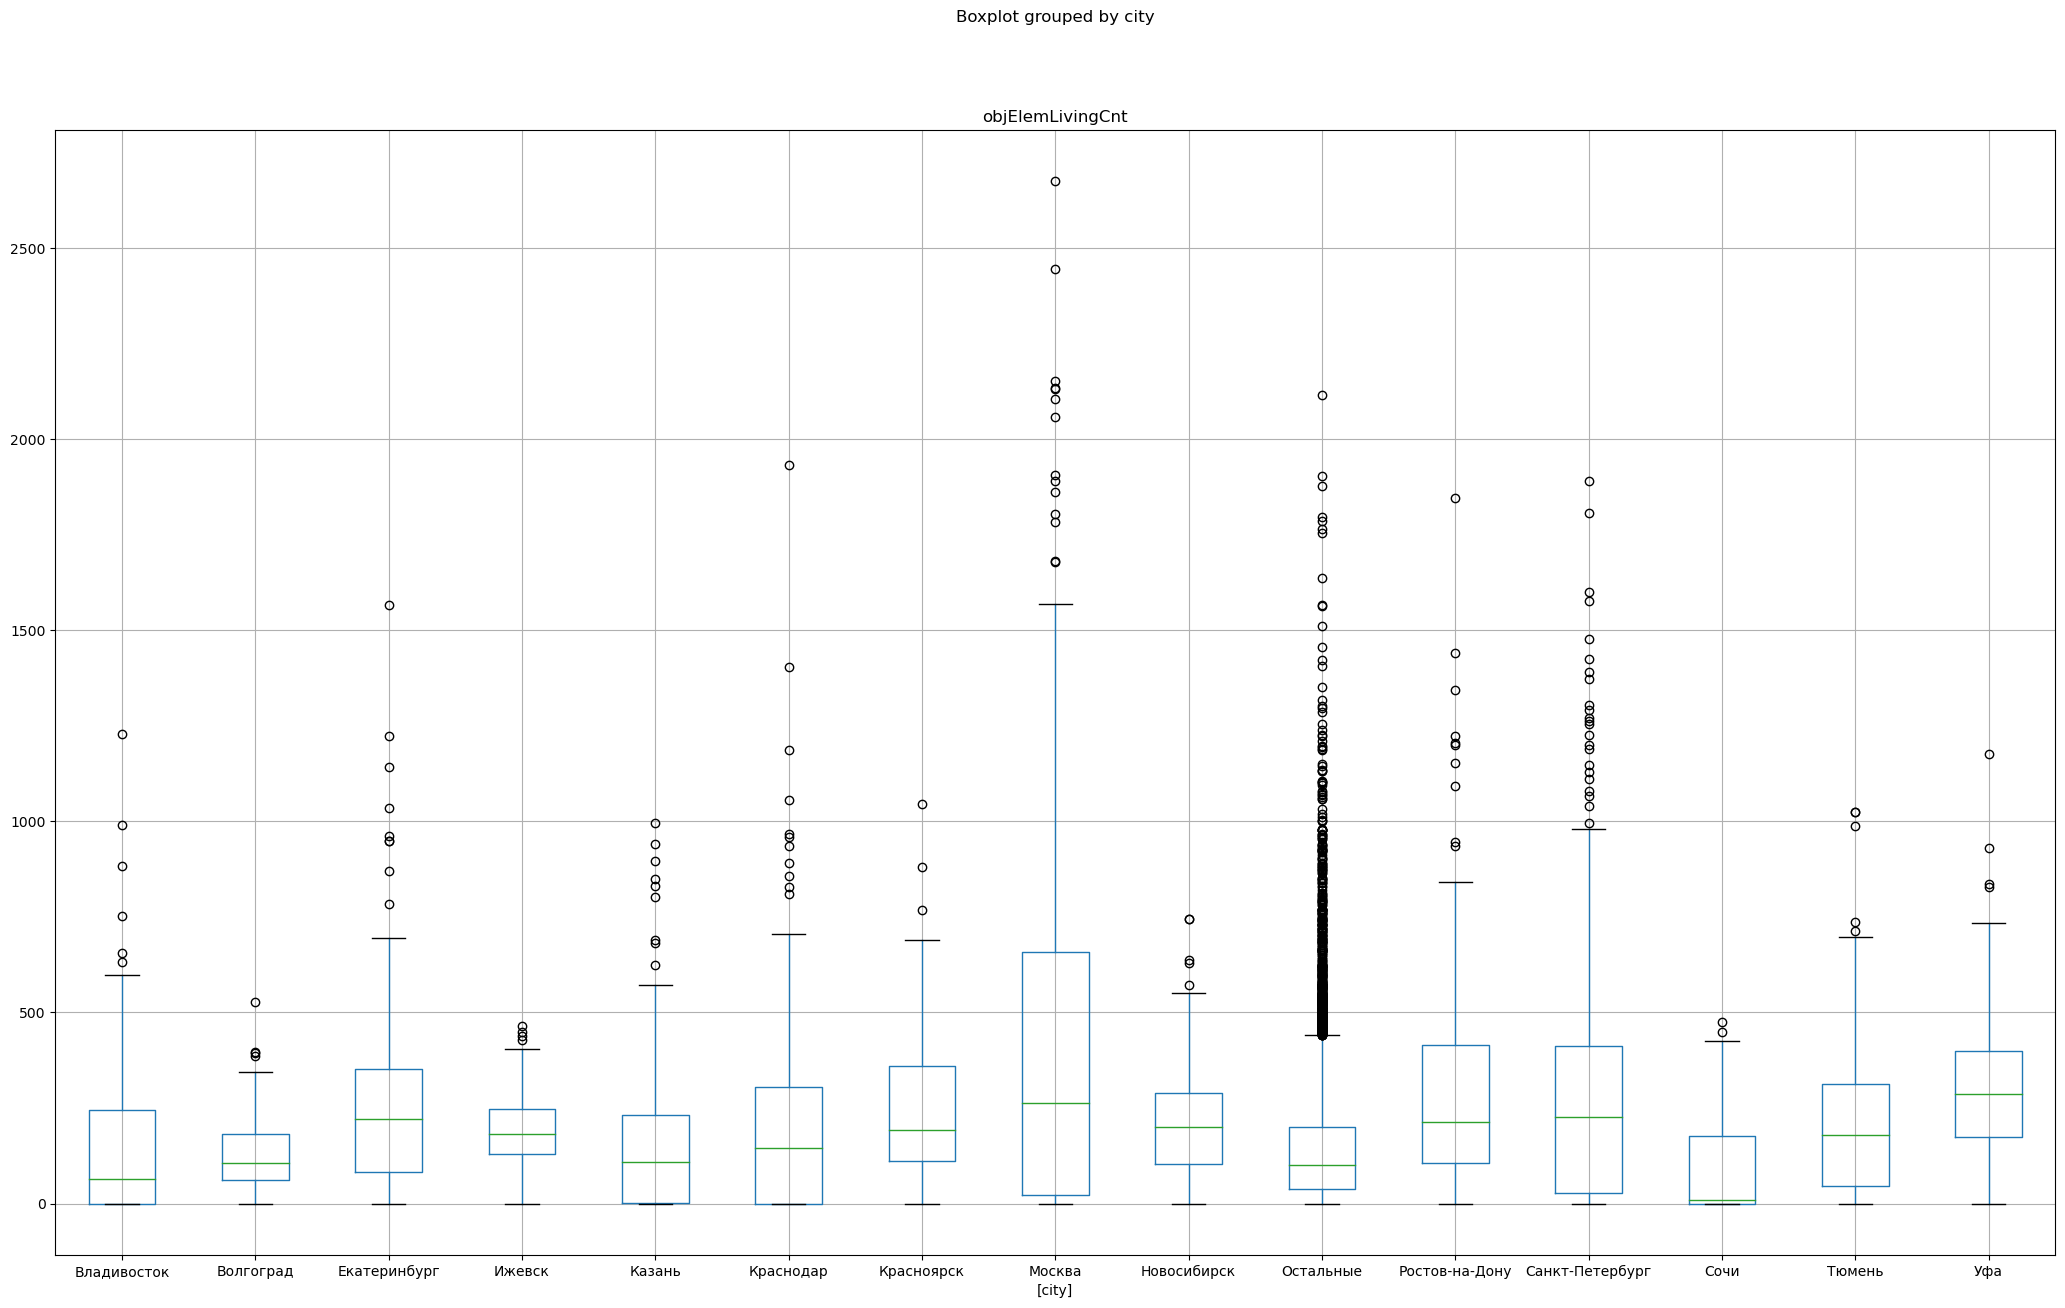

In [88]:
Visualizer(ObjectInfoExtractor(ids).get_df()).make_boxplot('objElemLivingCnt')

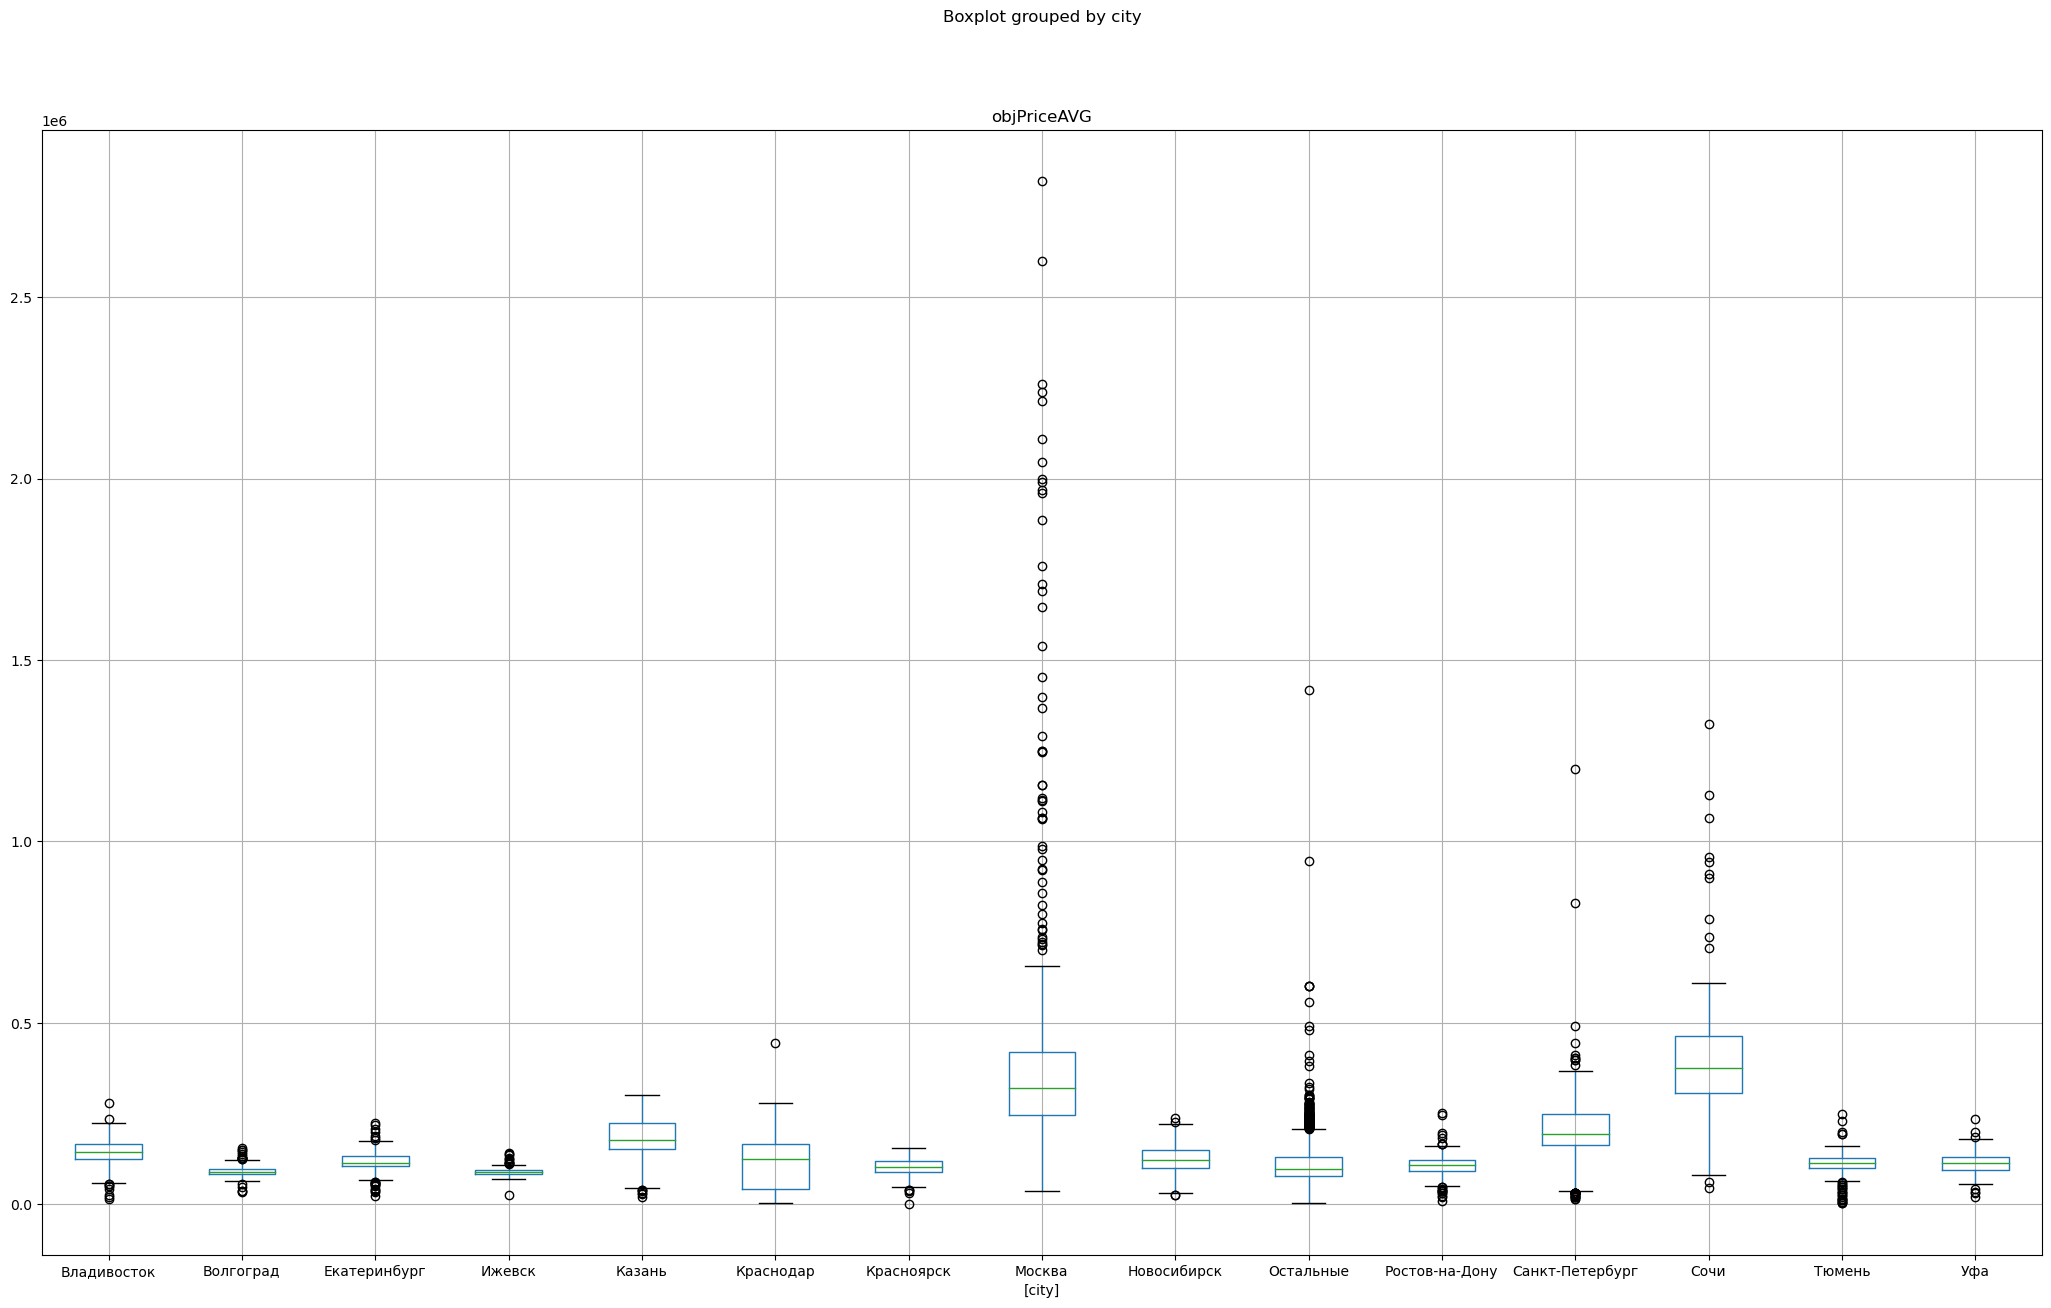

In [89]:
Visualizer(ObjectInfoExtractor(ids).get_df()).make_boxplot('objPriceAVG')

In [105]:
Visualizer(ObjectInfoExtractor(ids).get_df()).make_heatmap('objElemLivingCnt')

/var/folders/xw/bzf6d7bn6y58tbb2bqz4c0wm0000gn/T/ipykernel_59058/124932909.py:78: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  .set_precision(2).highlight_null('red')


,count,min,max,npmean
city,,,,
Остальные,7666,0.00,2115.00,154.28
Москва,659,0.00,2676.00,421.51
Краснодар,635,0.00,1932.00,192.80
Санкт-Петербург,423,0.00,1890.00,310.72
Екатеринбург,336,0.00,1566.00,248.27
Владивосток,298,0.00,1229.00,144.55
Тюмень,277,0.00,1025.00,215.43
Новосибирск,267,0.00,745.00,206.16
Казань,180,0.00,996.00,161.54
